In [30]:
import pandas as pd
from tensorflow import keras
from keras.models import *
import tensorflow as tf
from keras.layers import *
import tensorflow.keras.utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, AvgPool2D, Flatten, Dense, Input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
from numpy import argmax
from keras import datasets
import matplotlib.pyplot as plt


In [ ]:
!wget http://cb.lk/covid_19

!unzip covid_19

--2023-09-16 18:27:06--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2023-09-16 18:27:07--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2023-09-16 18:27:07--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e9405

In [ ]:
#ImageDataGenerator

train_data=ImageDataGenerator(rescale=1./255.)
test_data=ImageDataGenerator(rescale=1./255.)

train_dataset=train_data.flow_from_directory('/content/CovidDataset/Train',target_size=(224,224),class_mode='binary',shuffle=False)
test_dataset=test_data.flow_from_directory('/content/CovidDataset/Val',target_size=(224,224),class_mode='binary',shuffle=False)

In [ ]:
test_dataset.labels

In [ ]:
test_dataset.filenames

In [ ]:
import os
os.listdir('/content/CovidDataset/Val')

In [ ]:
os.listdir('/content/CovidDataset/Val/Normal')

In [ ]:
(train_dataset.class_indices,test_dataset.class_indices)


In [ ]:
len(test_dataset) #indictes that 60 images on 2 batches one batch is 28 size and the other is 32 size

In [ ]:
test_dataset[1][1]

In [ ]:
test_dataset[0][0][0].shape

In [ ]:
 VGG16_covid =Sequential()
 VGG16_covid.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
 VGG16_covid.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
 VGG16_covid.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
 VGG16_covid.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
 VGG16_covid.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
 VGG16_covid.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
 VGG16_covid.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 VGG16_covid.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
 VGG16_covid.add(Flatten(name='flatten'))
 VGG16_covid.add(Dense(4096, activation='relu', name='fc1'))
 VGG16_covid.add(Dense(4096, activation='relu', name='fc2'))
 VGG16_covid.add(Dense(1, activation='sigmoid', name='output'))
 VGG16_covid.summary()


In [ ]:
 VGG16_covid.compile(loss= keras.losses.binary_crossentropy, optimizer ='adam',metrics=['accuracy'])


In [14]:
VGG16_covid.fit(train_dataset,epochs=10,verbose=1,validation_data=test_dataset, steps_per_epoch=len(train_dataset), validation_steps=len(test_dataset),
                  callbacks=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True))

Epoch 1/10
7/7 [==============================] - 29s 2s/step - loss: 0.6959 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 6s 948ms/step - loss: 0.6952 - accuracy: 0.3571 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 7s 917ms/step - loss: 0.6949 - accuracy: 0.3571 - val_loss: 0.6921 - val_accuracy: 0.9500
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 0.6948 - accuracy: 0.4777 - val_loss: 0.6919 - val_accuracy: 0.7500
Epoch 5/10
7/7 [==============================] - 6s 900ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.9500
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 0.6945 - accuracy: 0.4821 - val_loss: 0.6916 - val_accuracy: 0.9333
Epoch 7/10
7/7 [==============================] - 7s 1s/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.7000
Epoch 8/10
7/7 [===============

In [15]:
VGG16_covid.evaluate(train_dataset)


7/7 [==============================] - 4s 540ms/step - loss: 0.6909 - accuracy: 0.9732


[0.6908646821975708, 0.9732142686843872]

In [16]:
VGG16_covid.evaluate(test_dataset)

2/2 [==============================] - 2s 623ms/step - loss: 0.6909 - accuracy: 0.9500


[0.6909005641937256, 0.949999988079071]

In [17]:
VGG16_covid.save('AlexNet_covid_19_model')


In [18]:
y_predict=(VGG16_covid.predict(test_dataset)>0.5).astype(int)

2/2 [==============================] - 2s 596ms/step


In [19]:
#image=load_img("/content/x-ray-image-2b_full.jpg" ,target_size=(224,224))
#image

In [20]:
#image=img_to_array(image)
#image.shape

In [21]:
#image=image/255

In [22]:
#image = np.expand_dims(image, axis=0)
#image = np.expand_dims(image, axis=-1)


In [23]:
#predictions = VGG16_covid.predict(image)

#predicted_class = np.argmax(predictions)

#print("Predictions :", predictions)
##print("Predicted class:", predicted_class)


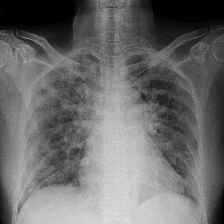

In [24]:
image2=load_img("/content/x-ray-image-2b_full.jpg" ,target_size=(224,224))
image2

In [25]:
image2 =tf.keras.preprocessing.image.img_to_array(image2)
image2.shape
image2 = image2/255
image2 =np.expand_dims(image2, axis =0)
image2.shape

(1, 224, 224, 3)

In [26]:
predict_image = VGG16_covid.predict(image2)
if predict_image>= 0.5:
    prediction = 'normal'
else:
    prediction = 'covid'
print(prediction)

predicted_class = np.argmax(predict_image)
print("Predicted class:", predicted_class)
print("Predicted :",predict_image )


1/1 [==============================] - 1s 769ms/step
covid
Predicted class: 0
Predicted : [[0.49888504]]


In [27]:
import pandas as pd
df =pd.DataFrame({'filename':test_dataset.filenames,'y_true':test_dataset.classes,'y_predict':y_predict[:,0]})
df


,filename,y_true,y_predict
0,Covid/16654_1_1.png,0,0
1,Covid/16654_2_1.jpg,0,0
2,Covid/16654_4_1.jpg,0,0
3,Covid/23E99E2E-447C-46E5-8EB2-D35D12473C39.png,0,0
4,Covid/31BA3780-2323-493F-8AED-62081B9C383B.jpeg,0,0
5,Covid/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg,0,0
6,Covid/4-x-day1.jpg,0,0
7,Covid/41591_2020_819_Fig1_HTML.webp-day10.png,0,0
8,Covid/41591_2020_819_Fig1_HTML.webp-day5.png,0,0
9,Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg,0,0


In [28]:
misclassification=df[df['y_true']!=df['y_predict']]
misclassification

,filename,y_true,y_predict
15,Covid/6b44464d-73a7-4cf3-bbb6-ffe7168300e3.ann...,0,1
33,Normal/NORMAL2-IM-0441-0001.jpeg,1,0
59,Normal/NORMAL2-IM-1275-0001.jpeg,1,0


In [29]:
misclassification['y_true'].count()

3